<a href="https://colab.research.google.com/github/ashwantmanikoth/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import ssl
import seaborn as sns
from google.colab import drive


In [6]:
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Teaching/TME_6015/Project/testdatasetemotion.csv')

Mounted at /content/drive


<ipython-input-6-06a5253cbb59>:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Teaching/TME_6015/Project/testdatasetemotion.csv')


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-13-ba61423d9ac9>:23: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Teaching/TME_6015/Project/testdatasetemotion.csv')


Epoch 1/4
13108/13108 [==============================] - 1477s 112ms/step - loss: 0.0890 - accuracy: 0.9894 - val_loss: 0.0444 - val_accuracy: 0.9908
Epoch 2/4
13108/13108 [==============================] - 1472s 112ms/step - loss: 0.0405 - accuracy: 0.9910 - val_loss: 0.0369 - val_accuracy: 0.9918
Epoch 3/4
13108/13108 [==============================] - 1490s 114ms/step - loss: 0.0341 - accuracy: 0.9918 - val_loss: 0.0325 - val_accuracy: 0.9930
Epoch 4/4
13108/13108 [==============================] - 1479s 113ms/step - loss: 0.0297 - accuracy: 0.9926 - val_loss: 0.0300 - val_accuracy: 0.9939
[0.9894487857818604, 0.9910104274749756, 0.9917709827423096, 0.992598295211792]
[0.08898396044969559, 0.040535926818847656, 0.03407055512070656, 0.02973119728267193]


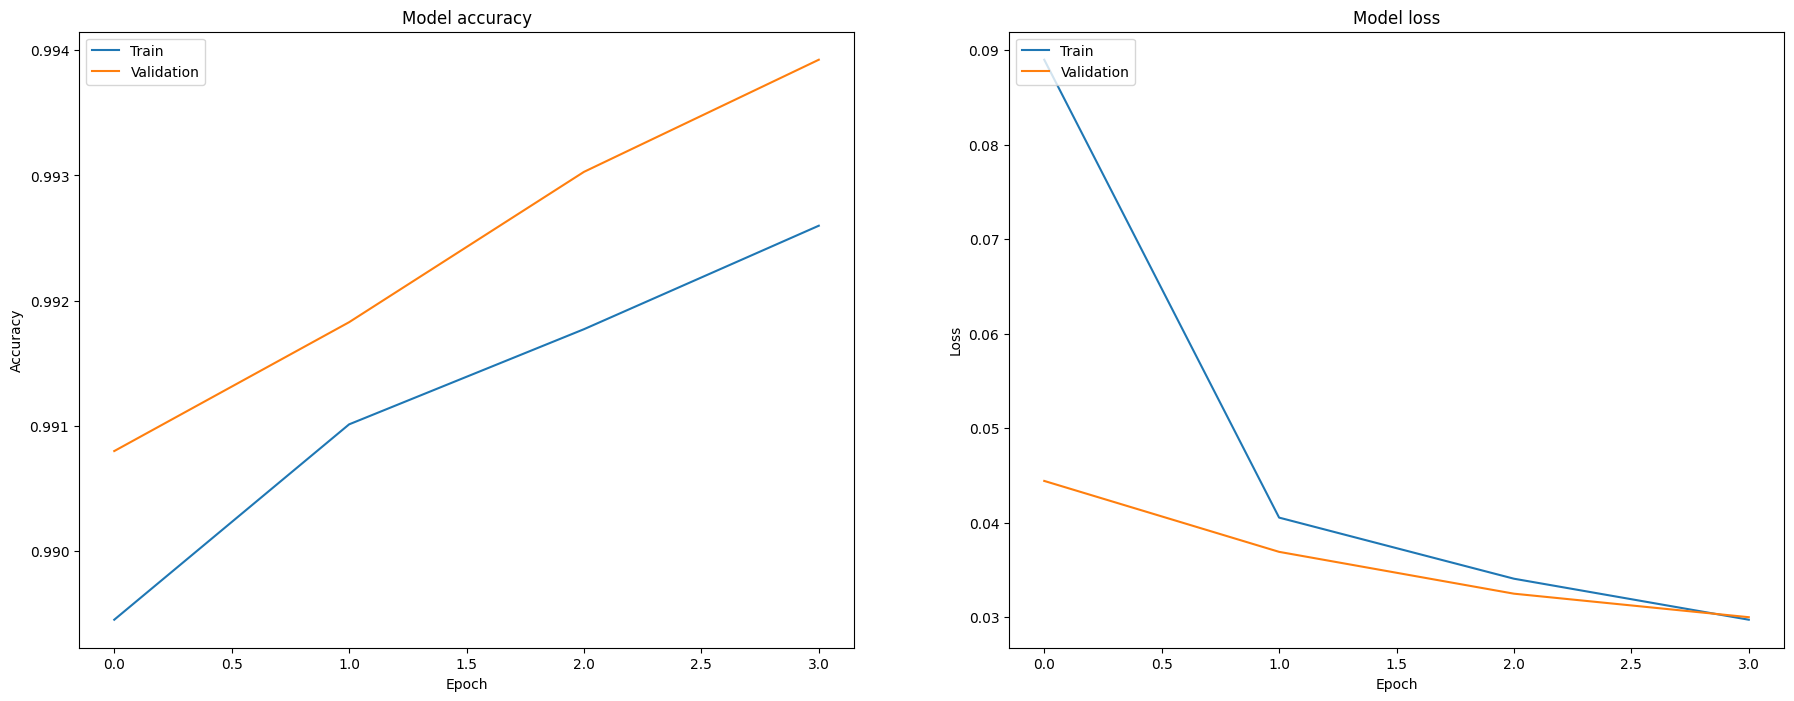

6554/6554 [==============================] - 102s 15ms/step


In [13]:


try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK stopwords
nltk.download()
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Mount your Google Drive
# drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Teaching/TME_6015/Project/testdatasetemotion.csv')
# df = pd.read_csv('/Users/ashwantmanikoth/Desktop/UNB/ML_workFlow/testdatasetemotion.csv',dtype={'Message': str, 'Emotion': str}, low_memory=False)

# df = df.head(4000)

df = df[df['Message'].astype(str).str.strip() != '']
df['Message'] = df['Message'].astype(str)

df['Message'] = df['Message'].apply(remove_stop_words)

# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    df['Message'], df['Emotion'] , test_size=0.2, random_state=42)

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to your labels and transform them to integers
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_reviews)
X_train_seq = tokenizer.texts_to_sequences(train_reviews)
X_test_seq = tokenizer.texts_to_sequences(test_reviews)
X_train_pad = pad_sequences(X_train_seq, maxlen=150)  # Adjust maxlen as needed
X_test_pad = pad_sequences(X_test_seq, maxlen=150)

# Building the LSTM model with cuDNN optimization
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=150))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(4, dropout=0.2))  # Removed recurrent_dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(133, activation='softmax', dtype='float32'))  # Ensure output layer uses float32


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, train_labels,batch_size=64, epochs=4,
                    validation_data=(X_test_pad, test_labels))
print(history.history['accuracy'])
print(history.history['loss'])

# Plot training & validation accuracy values
plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [18]:
model.save('/content/drive/MyDrive/Teaching/TME_6015/Project/Model/SentimentAnalysis_1.keras')


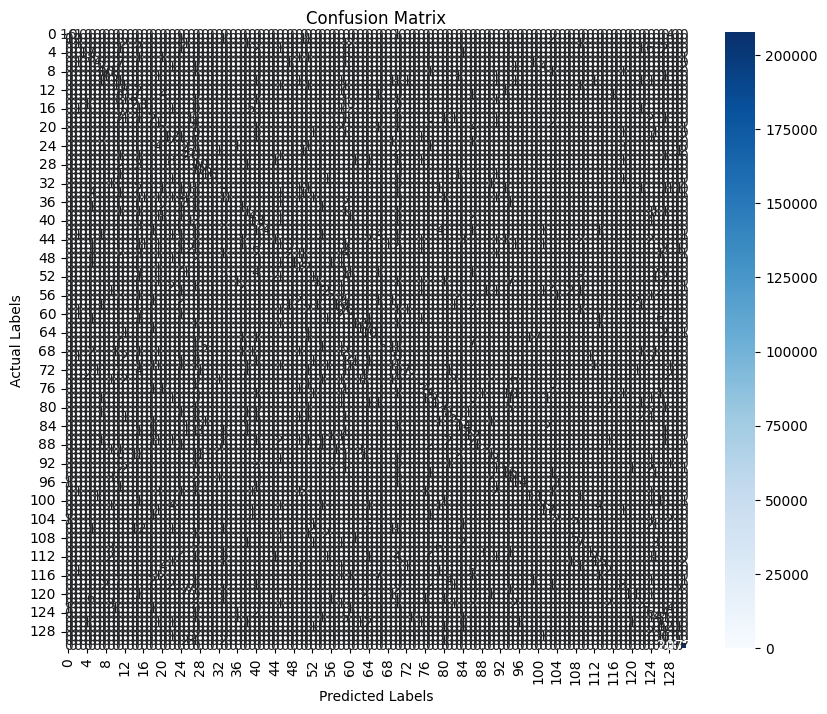

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       1.00      0.67      0.80        18
           2       0.10      0.07      0.08        14
           3       0.00      0.00      0.00        14
           4       0.81      0.89      0.85        19
           5       0.30      0.62      0.40        13
           6       0.67      0.27      0.38        15
           7       0.18      0.18      0.18        11
           8       0.83      0.71      0.77        14
           9       0.48      0.79      0.60        19
          10       0.00      0.00      0.00        13
          11       0.17      0.73      0.28        15
          12       0.36      0.57      0.44        14
          13       0.00      0.00      0.00         7
          14       0.60      0.30      0.40        20
          15       0.29      0.88      0.44        26
          16       0.00      0.00      0.00        16
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:


# Evaluate the model
model.evaluate(X_test_pad, test_labels)

# Predict classes
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

 # Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print the classification report
print(classification_report(test_labels, y_pred_classes))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, y_pred_classes)
print(f"Accuracy: {accuracy}")
